In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats


import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC



In [2]:
# Import data

dt = pd.read_excel (r'F:\Program\OneDrive\TLNC\ISI\data\Thuy_data.xlsx')
dt.columns
dt.shape

Index(['Unnamed: 0', 'Lying', 'Unnamed: 2', 'Unnamed: 3', 'Sitting',
       'Unnamed: 5', 'Unnamed: 6', 'Standing', 'Unnamed: 8', 'Unnamed: 9',
       'Normal walking', 'Unnamed: 11', 'Unnamed: 12', 'Active walking',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

(4201, 16)

In [3]:
Lying = dt[['Lying', 'Unnamed: 2', 'Unnamed: 3']] 
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)

Sitting = dt[['Sitting', 'Unnamed: 5', 'Unnamed: 6']] 
Sitting = Sitting.dropna()
Sitting.index = pd.RangeIndex(len(Sitting.index))
Sitting = Sitting.drop(0)

Standing = dt[['Standing', 'Unnamed: 8', 'Unnamed: 9']] 
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)

Normal_walking = dt[['Normal walking', 'Unnamed: 11', 'Unnamed: 12']] 
Normal_walking = Normal_walking.dropna()
Normal_walking.index = pd.RangeIndex(len(Normal_walking.index))
Normal_walking = Normal_walking.drop(0)

Active_walking = dt[['Active walking', 'Unnamed: 14', 'Unnamed: 15']] 
Active_walking = Active_walking.dropna()
Active_walking.index = pd.RangeIndex(len(Active_walking.index)) 
Active_walking = Active_walking.drop(0)

In [4]:
# Split dataset to 2 parts: Train (60%) - Test (40%)\n",

window_size = 16
stride = 6 #step

# range (start, stop, step)
X_ly_train = [Lying[i:i+window_size] for i in range(0, int(len(Lying)*0.6), stride)] 
X_ly_test = [Lying[i:i+window_size] for i in range(int(len(Lying)*0.6), len(Lying), stride) 
                                            if i+window_size<=len(Lying)]

X_sit_train = [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)*0.6), stride)] 
X_sit_test = [Sitting[i:i+window_size] for i in range(int(len(Sitting)*0.6), len(Sitting), stride) 
                                        if i+window_size<=len(Sitting)]

X_stand_train = [Standing[i:i+window_size] for i in range(0, int(len(Standing)*0.6), stride)] 
X_stand_test = [Standing[i:i+window_size] for i in range(int(len(Standing)*0.6), len(Standing), stride) 
                                            if i+window_size<=len(Standing)]

X_norwalk_train = [Normal_walking[i:i+window_size] for i in range(0, int(len(Normal_walking)*0.6), stride)]
X_norwalk_test = [Normal_walking[i:i+window_size] for i in range(int(len(Normal_walking)*0.6), len(Normal_walking),stride) 
                                            if i+window_size<=len(Normal_walking)]

X_actwalk_train = [Active_walking[i:i+window_size] for i in range(0, int(len(Active_walking)*0.6), stride)]
X_actwalk_test = [Active_walking[i:i+window_size] for i in range(int(len(Active_walking)*0.6), len(Active_walking), stride) 
                                            if i+window_size<=len(Active_walking)]

print ('X_ly_train: ', len (X_ly_train))
print ('X_ly_test: ', len (X_ly_test))

print ('X_sit_train: ', len (X_sit_train))
print ('X_sit_test: ', len (X_sit_test))

print ('X_stand_train: ', len(X_stand_train))
print ('X_stand_test: ', len(X_stand_test))

print ('X_norwalk_train: ', len(X_norwalk_train))
print ('X_norwalk_test: ', len(X_norwalk_test))


print ('X_actwalk_train: ', len (X_actwalk_train))
print ('X_actwalk_test: ', len (X_actwalk_test))

X_ly_train:  417
X_ly_test:  276
X_sit_train:  300
X_sit_test:  198
X_stand_train:  320
X_stand_test:  211
X_norwalk_train:  408
X_norwalk_test:  270
X_actwalk_train:  290
X_actwalk_test:  191


In [5]:
train_data = []
train_label = []

test_data = []
test_label = []

for acts in X_ly_train:
    train_data.append(acts)
    train_label.append(0)
     
for acts in X_sit_train:
    train_data.append(acts)
    train_label.append(1)

for acts in X_stand_train:
    train_data.append(acts)
    train_label.append(2)

for acts in X_norwalk_train:
    train_data.append(acts)
    train_label.append(3)

for acts in X_actwalk_train:
    train_data.append(acts)
    train_label.append(4)

print('train-data length: ', len(train_data) )
print('train-label length: ', len(train_label) )
      
# For TEST

for acts in X_ly_test:
    test_data.append(acts)
    test_label.append(0)

for acts in X_sit_test:
    test_data.append(acts)
    test_label.append(1)

for acts in X_stand_test:
    test_data.append(acts)
    test_label.append(2)

for acts in X_norwalk_test:
    test_data.append(acts)
    test_label.append(3)

for acts in X_actwalk_test:
    test_data.append(acts)
    test_label.append(4)

print('test-data length: ', len(test_data))
print('test-label length: ', len(test_label))

train-data length:  1735
train-label length:  1735
test-data length:  1146
test-label length:  1146


In [6]:
target_names = ['Standing', 'Walking', 'Sitting', 'Jogging']

def averageAbsolute(arr):
    result = []
    for i in arr:
        differAbsolute = i - np.mean(arr)
        result = np.append(result,abs(differAbsolute))
    return np.mean(result)

def averageResultant(x, y, z):
    ans = np.array([])
    for i,j,k in zip(x, y, z):
        x = np.sqrt(i*i+j*j+k*k)
        ans = np.append(ans,x)
    return np.mean(ans)

def featuresFromBuffer(at):
    feat = np.zeros(25)    # return array float([ 0.,  0.,  0.,  0., ....., 0.])
                            # a vector of 21 features from each window
    x = np.array(at.iloc[:,0], dtype=np.float64)   
    y = np.array(at.iloc[:,1], dtype=np.float64)   
    z = np.array(at.iloc[:,2], dtype=np.float64)  
    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means 
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms

    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[6:9] = std

    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[9:12] = med

    # Range
    Range1 = [ np.amin(i) for i in [x, y, z]]    
    feat[12:15] = Range1
    Range2 = [ np.amax(i) for i in [x, y, z]]    
    feat[15:18] = Range2
    
    #average Absolute
    averAbs = [averageAbsolute(i) for i in [x,y,z]]
    feat[18:21] = averAbs
    
    #averageResultant
    feat[21] = averageResultant(x, y, z)
    
    #var
    var = [np.var(i) for i in [x, y, z]]
    feat[22:25] = var
    
#     x_pd = pd.Series(x)
#     y_pd = pd.Series(y)
#     z_pd = pd.Series(z)
#     Pearsonr_xy = x_pd.corr(y_pd)
#     feat[18] = Pearsonr_xy
#     Pearsonr_yz = y_pd.corr(z_pd)
#     feat[19] = Pearsonr_yz
#     Pearsonr_zx = z_pd.corr(x_pd)
#     feat[20] = Pearsonr_zx
    
#     mad = [stats.median_absolute_deviation(i) for i in [x, y, z]]   
#     feat[21:24] = mad
    
    return feat

In [7]:
# Features set

train_features = []
test_features = []
for action in train_data:
    feat = featuresFromBuffer(action)
    train_features.append(feat)  

for action in test_data:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

len(train_features)
len(test_features)


1735

1146

In [8]:
# Classifier 

print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))

print("\n\nDecision Tree:") 
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree  

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, train_label)
print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf2.score(train_features, train_label)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
.format(clf2.score(test_features, test_label)))

print("\n\nSVM:")
clf3 = SVC(C=100, gamma='scale').fit(train_features, train_label)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, train_label)))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, test_label)))

print('\n\nRandom Forests: ')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, train_label)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf4.score(train_features, train_label)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf4.score(test_features, test_label)))

print('\n\nKNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, train_label)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, train_label)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, test_label)))

Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 1.000
Accuracy of GBDT classifier on test set: 0.989


Decision Tree:
Accuracy of Decision Tree classifier on training set: 0.992
Accuracy of Decision Tree classifier on test set: 0.988


SVM:
Accuracy on training set: 0.98
Accuracy on test set: 0.98


Random Forests: 
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.994


KNeighbor: 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.98


<Figure size 560x400 with 0 Axes>

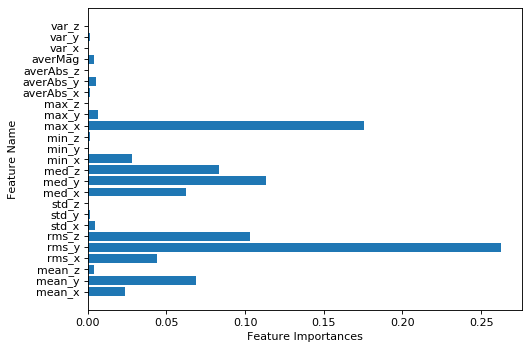

Feature importances: [2.40329941e-02 6.86929771e-02 4.31840808e-03 4.43852110e-02
 2.62588289e-01 1.02904182e-01 4.40525385e-03 1.53917332e-03
 1.86784313e-04 6.28316020e-02 1.13492936e-01 8.35129746e-02
 2.80576730e-02 1.01261653e-03 1.53405708e-03 1.75804983e-01
 6.66562022e-03 2.99853088e-04 1.67041947e-03 5.21537915e-03
 4.04158048e-04 4.01330033e-03 2.86020912e-04 1.83879284e-03
 3.06341044e-04]


In [9]:
# adspy_shared_utilities import plot_feature_importances
# Atturibute Feature importances only use for classifiers contain trees

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'min_x', 'min_y', 'min_z',
                'max_x', 'max_y', 'max_z',
                'averAbs_x', 'averAbs_y', 'averAbs_z',
                'averMag', 'var_x','var_y','var_z']


def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature Name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(7,5), dpi=80)
plot_feature_importances(clf1, feature_names)
plt.show()

print('Feature importances: {}'.format(clf1.feature_importances_))

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Lying')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Sitting')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Standing')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Normal_walking')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Amplitude')

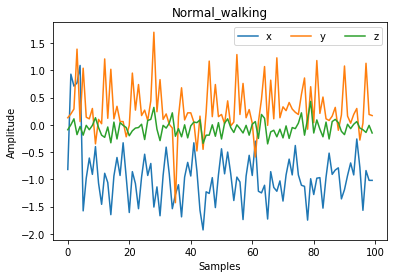

Text(0.5, 1, 'Active_walking')

Text(0.5, 17.200000000000003, 'Samples')

Text(17.200000000000003, 0.5, 'Amplitude')

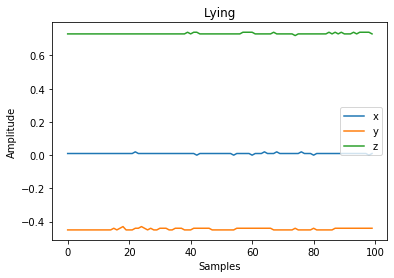

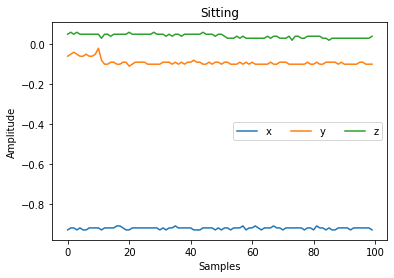

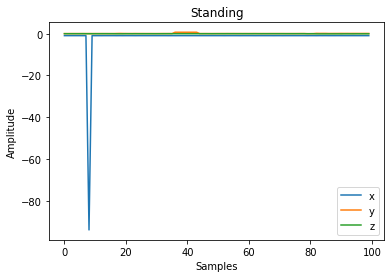

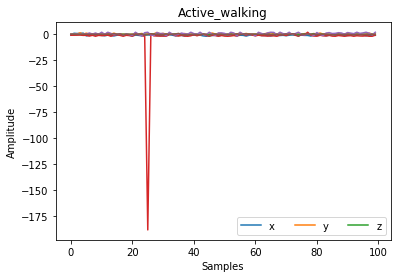

In [12]:
#plot Thuy_data with 100 samples

sample = range(0,100)
plt.figure(1)
plt.plot(sample,Lying[0:100])
plt.title('Lying')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(["x","y","z"])

plt.figure(2)
plt.plot(sample,Sitting[0:100])
plt.title('Sitting')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(["x","y","z"],ncol = 3)

plt.figure(3)
plt.plot(sample,Standing[0:100])
plt.title('Standing')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(["x","y","z"])

plt.figure(4)
plt.plot(sample,Normal_walking[0:100])
plt.title('Normal_walking')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(["x","y","z"],ncol = 3)

plt.figure(4)
plt.plot(sample,Active_walking[0:100])
plt.title('Active_walking')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(["x","y","z"],ncol = 3)
